In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Convert labels to categorical one-hot encoded
y_train_en = to_categorical(y_train, num_classes=10)
y_test_en = to_categorical(y_test, num_classes=10)

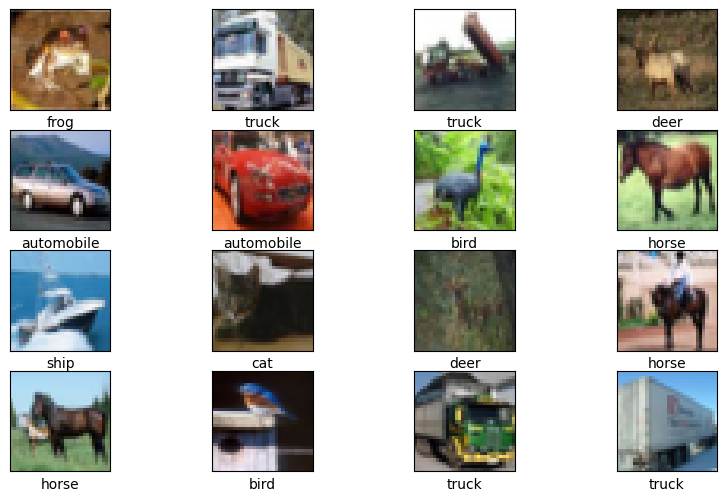

In [5]:
# Display sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
# Define the model architecture
model = Sequential([
    Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (4, 4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(512, (4, 4), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (4, 4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (4, 4), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (4, 4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
# Fit the model with early stopping
history = model.fit(X_train, y_train_en, epochs=7, verbose=1,
                    validation_data=(X_test, y_test_en), callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)

print('\nTest accuracy:', test_acc)

Epoch 1/7
   8/1563 [..............................] - ETA: 1:32:32 - loss: 3.3650 - accuracy: 0.1250

KeyboardInterrupt: 

In [ ]:
#Tesing with Image Files
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess an image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(32, 32))  # Load the image and resize to 32x32
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    return img_array

# List of paths to your images
image_paths = ['cat.jpeg', 'dog.jpeg', 'car.jpeg', 'bird.jpeg', 'horse.jpeg']

# Map the predicted class index to the class name
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loop through each image, preprocess, predict, and display the result
for image_path in image_paths:
    preprocessed_image = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_class_name = class_names[predicted_class[0]]

    # Print the prediction
    print(f'The model predicts that the image {image_path} is a: {predicted_class_name}')

    # Display the image and the prediction
    plt.figure()
    plt.imshow(load_img(image_path))
    plt.title(f'Predicted: {predicted_class_name}')
    plt.show()


In [10]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Assuming you have trained and saved your model as `model`

# Load CIFAR-10 test dataset
(_, _), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
test_images = test_images / 255.0

# Convert labels to categorical one-hot encoded
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {accuracy:.4f}')

# Predict classes for test set
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_true = np.argmax(test_labels, axis=-1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


133/313 [===========>..................] - ETA: 2:53 - loss: 2.5719 - accuracy: 0.0980

KeyboardInterrupt: 

In [12]:
import tensorflow as tf
# Save the entire model as a SavedModel
model.save('image_tagging_model')

# Import the necessary module to download files
from google.colab import files

# Create a zip file of the saved model
!zip -r image_tagging_model.zip image_tagging_model/

# Download the zip file
files.download('image_tagging_model.zip')


  adding: image_tagging_model/ (stored 0%)
  adding: image_tagging_model/saved_model.pb (deflated 89%)
  adding: image_tagging_model/keras_metadata.pb (deflated 94%)
  adding: image_tagging_model/variables/ (stored 0%)
  adding: image_tagging_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: image_tagging_model/variables/variables.index (deflated 73%)
  adding: image_tagging_model/fingerprint.pb (stored 0%)
  adding: image_tagging_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>